<a href="https://colab.research.google.com/github/yuanchaohu/Colab_learning/blob/main/transit_learning_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VGG16

In [1]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [2]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
    ])

trainset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=True, download=True,transform=transform)
testset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=False, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /root/.pytorch/CIFAR10/cifar-10-python.tar.gz to /root/.pytorch/CIFAR10


In [5]:
for images, labels in trainloader:
  print(images.size(), labels.size())
  break

torch.Size([64, 3, 224, 224]) torch.Size([64])


In [6]:
model = models.vgg16(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [7]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [9]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [10]:
for params in model.parameters():
    params.requires_grad = False

In [11]:
model.classifier[-1] = nn.Sequential(nn.Linear(in_features=4096, out_features=10),
                                     nn.LogSoftmax(dim=1))

In [12]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=10, bias=True)
    (1): LogSoftmax(dim=1)
  )
)

In [13]:
criterion = nn.NLLLoss()

In [14]:
#autograd with tensors

In [15]:
w = torch.randn(4, 3, requires_grad=True)

In [16]:
w

tensor([[ 0.2912,  1.6909, -1.1488],
        [-1.3980, -0.4260, -0.1896],
        [-1.3463,  1.0735, -0.0482],
        [ 1.6063,  0.7751, -0.5726]], requires_grad=True)

In [17]:
w.requires_grad_(False)

tensor([[ 0.2912,  1.6909, -1.1488],
        [-1.3980, -0.4260, -0.1896],
        [-1.3463,  1.0735, -0.0482],
        [ 1.6063,  0.7751, -0.5726]])

In [19]:
w.requires_grad_(True)

tensor([[ 0.2912,  1.6909, -1.1488],
        [-1.3980, -0.4260, -0.1896],
        [-1.3463,  1.0735, -0.0482],
        [ 1.6063,  0.7751, -0.5726]], requires_grad=True)

In [20]:
y = torch.exp(w)
y

tensor([[1.3381, 5.4243, 0.3170],
        [0.2471, 0.6531, 0.8273],
        [0.2602, 2.9257, 0.9529],
        [4.9841, 2.1707, 0.5641]], grad_fn=<ExpBackward0>)

In [21]:
output = y.mean()
output

tensor(1.7221, grad_fn=<MeanBackward0>)

In [22]:
w.grad

In [23]:
output.backward()

In [24]:
w.grad

tensor([[0.1115, 0.4520, 0.0264],
        [0.0206, 0.0544, 0.0689],
        [0.0217, 0.2438, 0.0794],
        [0.4153, 0.1809, 0.0470]])

In [25]:
output.requires_grad

True

In [26]:
with torch.no_grad():
    output = (w+y).mean()

output.requires_grad

False

# training the fixed feature extractor

In [27]:
from torch.optim import Adam

model = model.to(device)
optimizer = Adam(model.parameters())

In [28]:
model.parameters()

<generator object Module.parameters at 0x7f1b91fa6f50>

In [29]:
num_epochs = 1
batch_loss = 0
cum_epoch_loss = 0 

for epoch in range(num_epochs):
    
    for batch, (images, labels) in enumerate(trainloader, 1):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        batch_loss += loss.item()
        print(f'Epoch{epoch}/{num_epochs}: batch number {batch}/{len(trainloader)} batch loss: {loss.item()}')
    print(f"training loss: {batch_loss/len(trainloader)}")

Epoch0/1: batch number 1/782 batch loss: 2.317230463027954
Epoch0/1: batch number 2/782 batch loss: 2.120943307876587
Epoch0/1: batch number 3/782 batch loss: 2.067613124847412
Epoch0/1: batch number 4/782 batch loss: 1.9265928268432617
Epoch0/1: batch number 5/782 batch loss: 1.774679183959961
Epoch0/1: batch number 6/782 batch loss: 1.5595531463623047
Epoch0/1: batch number 7/782 batch loss: 1.4906800985336304
Epoch0/1: batch number 8/782 batch loss: 1.446669340133667
Epoch0/1: batch number 9/782 batch loss: 1.4755802154541016
Epoch0/1: batch number 10/782 batch loss: 1.4269354343414307
Epoch0/1: batch number 11/782 batch loss: 1.325737476348877
Epoch0/1: batch number 12/782 batch loss: 1.290224552154541
Epoch0/1: batch number 13/782 batch loss: 1.0698575973510742
Epoch0/1: batch number 14/782 batch loss: 1.0525784492492676
Epoch0/1: batch number 15/782 batch loss: 1.1903692483901978
Epoch0/1: batch number 16/782 batch loss: 0.9884569048881531
Epoch0/1: batch number 17/782 batch loss

In [30]:
CIFAR10_classes = ['plane', 'car', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

model.to('cpu')

model.eval()

with torch.no_grad():
    images, labels = next(iter(trainloader))
    logps = model(images)

    output = torch.exp(logps)
    print(output)

tensor([[1.2233e-04, 2.7954e-06, 1.6172e-04, 1.4751e-03, 1.1928e-03, 7.4476e-03,
         6.7263e-07, 9.8936e-01, 1.0713e-05, 2.2942e-04],
        [8.5885e-05, 3.0467e-06, 8.9886e-01, 5.7474e-02, 6.3338e-04, 1.2903e-03,
         4.1530e-02, 5.2214e-05, 6.7994e-05, 4.3508e-06],
        [9.2623e-05, 5.5834e-04, 3.1865e-04, 9.8123e-01, 7.6567e-04, 4.7546e-03,
         2.4013e-03, 3.8371e-05, 9.7839e-03, 5.2025e-05],
        [3.0325e-05, 1.8902e-05, 2.5338e-03, 8.6142e-01, 2.9518e-03, 1.0865e-01,
         2.4217e-04, 2.3829e-02, 6.3337e-05, 2.6186e-04],
        [4.7182e-03, 7.7472e-04, 4.2987e-01, 1.4459e-01, 2.1289e-01, 1.0253e-01,
         5.1480e-02, 4.1456e-02, 6.6625e-03, 5.0273e-03],
        [1.0888e-04, 2.6369e-04, 6.4339e-03, 7.8197e-02, 1.2629e-02, 5.6068e-01,
         3.3607e-01, 4.3032e-03, 6.2610e-04, 6.8826e-04],
        [1.1525e-03, 1.8405e-05, 1.9243e-03, 9.0046e-05, 9.8976e-01, 1.1977e-04,
         9.6482e-05, 6.8120e-03, 1.9249e-05, 1.1685e-05],
        [5.6767e-04, 1.6695

In [31]:
output.shape

torch.Size([64, 10])

In [32]:
CIFAR10_classes = ['plane', 'car', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

model.to('cpu')

model.eval()

with torch.no_grad():
    images, labels = next(iter(testloader))
    logps = model(images)

    output = torch.exp(logps)

    pred = torch.argmax(output, 1)
    

model.train()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

bird


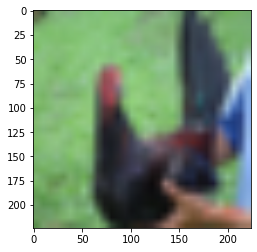

In [37]:
test_image_id = 25
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np 

def denormalize(tensor):
    tensor = tensor * std + mean
    return tensor

def show_img(img):
    img = img.numpy().transpose((1, 2, 0))
    img = denormalize(img)
    img = np.clip(img, 0, 1)
    plt.imshow(img)

def get_CIFAR10_class(id):
    CIFAR10_classes = ['plane', 'car', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']
    return CIFAR10_classes[id]

show_img(images[test_image_id])
print(get_CIFAR10_class(pred[test_image_id]))

In [38]:
pred

tensor([3, 1, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 1,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 5, 4, 1, 9, 5, 2, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 3, 3, 5, 7, 3, 6, 3])

In [40]:
images.size()

torch.Size([64, 3, 224, 224])

In [41]:
images[0].size()

torch.Size([3, 224, 224])

In [42]:
plt.imshow()

TypeError: ignored

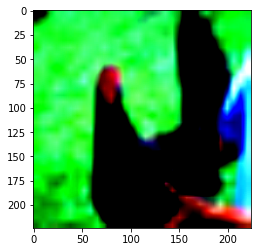

In [43]:
plt.imshow(np.clip(np.transpose(images[test_image_id], (1, 2, 0)), 0, 1))

In [44]:
images[test_image_id].size()

torch.Size([3, 224, 224])

In [45]:
np.transpose(images[test_image_id], (1, 2, 0)).shape

torch.Size([224, 224, 3])

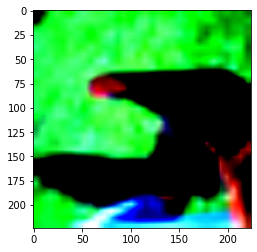

In [46]:
plt.imshow(np.clip(np.transpose(images[test_image_id], (2, 1, 0)), 0, 1))

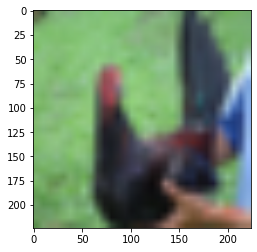

In [47]:
show_img(images[test_image_id])

In [50]:
get_CIFAR10_class(pred[test_image_id])

'bird'

#accuracy of the model

In [52]:
pred, labels

(tensor([3, 1, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 1,
         5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 5, 4, 1, 9, 5, 2, 6, 5, 6, 0, 9, 3, 9,
         7, 6, 9, 8, 0, 3, 8, 8, 7, 3, 3, 5, 7, 3, 6, 3]),
 tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
         5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
         7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3]))

In [53]:
pred == labels

tensor([ True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False, False, False,
         True,  True,  True,  True])

In [54]:
model.eval()
with torch.no_grad():
    num_correct = 0 
    total = 0

    cnt = 0
    for images, labels in testloader:
        logps = model(images)
        output = torch.exp(logps)
        print(output)

        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()


        cnt += 1
        if cnt == 5:
            break
    
    print(f"accuracy of the model on {total} test images: {num_correct*100/total}")

tensor([[5.3750e-04, 1.0065e-02, 1.7747e-03, 8.3274e-01, 1.6612e-04, 1.0878e-01,
         4.2188e-02, 2.6597e-03, 7.4638e-04, 3.4335e-04],
        [9.8421e-03, 5.4179e-01, 5.1632e-05, 5.8670e-05, 2.0275e-06, 8.6898e-06,
         2.2950e-06, 4.4842e-06, 4.4693e-01, 1.3166e-03],
        [8.7905e-04, 1.7281e-02, 2.5621e-06, 1.2525e-06, 6.1516e-07, 2.5127e-07,
         1.7893e-08, 3.2649e-06, 9.8171e-01, 1.2395e-04],
        [4.9750e-01, 3.7659e-03, 9.1856e-02, 1.2197e-01, 8.2032e-04, 2.9642e-03,
         3.7324e-03, 1.8833e-03, 2.7398e-01, 1.5290e-03],
        [1.2988e-07, 7.6422e-07, 2.8989e-03, 4.1275e-04, 5.9860e-04, 6.9773e-05,
         9.9602e-01, 2.5008e-07, 1.4459e-07, 4.9685e-07],
        [1.6341e-06, 6.8200e-06, 1.0542e-04, 6.2390e-02, 5.1603e-02, 4.0636e-01,
         4.7900e-01, 4.8160e-04, 2.7197e-07, 4.6089e-05],
        [5.5648e-06, 9.9849e-01, 3.1453e-07, 2.2392e-05, 5.5853e-09, 6.9310e-05,
         1.6090e-07, 8.7608e-06, 6.6951e-07, 1.4053e-03],
        [5.2550e-02, 3.4159

# fine tuning

In [57]:
model.to('cuda')

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [59]:
for params in model.parameters():
    #print(params.requires_grad)
    params.requires_grad = False

In [60]:
for i in range(7):
    model.classifier[i].requires_grad = True

In [61]:
model.classifier[6]

Sequential(
  (0): Linear(in_features=4096, out_features=10, bias=True)
  (1): LogSoftmax(dim=1)
)

In [62]:
model.classifier[6] = nn.Sequential(
    nn.Linear(4096, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 10),
    nn.LogSoftmax(dim=1)
)

In [63]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [64]:
criterion = nn.NLLLoss()

In [65]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

# training from fully connected network onwards

In [66]:
model = model.to(device)
optimizer = Adam(filter(lambda p: p.requires_grad, model.parameters()))

num_epochs = 1
batch_loss = 0 
cum_epoch_loss = 0 

for epoch in range(num_epochs):
    batch_loss = 0
    for batch, (images, labels) in enumerate(trainloader, 1):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        batch_loss += loss.item()
        print(f"Epoch{epoch}/{num_epochs}: batch number {batch}/{len(trainloader)}, batch loss: {loss.item()}")
    
    print(f"training loss for each epoch: {batch_loss/len(trainloader)}")

Epoch0/1: batch number 1/782, batch loss: 2.3561158180236816
Epoch0/1: batch number 2/782, batch loss: 2.048997402191162
Epoch0/1: batch number 3/782, batch loss: 1.7082747220993042
Epoch0/1: batch number 4/782, batch loss: 1.5325731039047241
Epoch0/1: batch number 5/782, batch loss: 1.5135024785995483
Epoch0/1: batch number 6/782, batch loss: 1.2969748973846436
Epoch0/1: batch number 7/782, batch loss: 1.24626624584198
Epoch0/1: batch number 8/782, batch loss: 1.0891180038452148
Epoch0/1: batch number 9/782, batch loss: 1.0764657258987427
Epoch0/1: batch number 10/782, batch loss: 1.001230001449585
Epoch0/1: batch number 11/782, batch loss: 0.8406891822814941
Epoch0/1: batch number 12/782, batch loss: 0.9077379107475281
Epoch0/1: batch number 13/782, batch loss: 0.828586757183075
Epoch0/1: batch number 14/782, batch loss: 0.9450154900550842
Epoch0/1: batch number 15/782, batch loss: 0.8563005328178406
Epoch0/1: batch number 16/782, batch loss: 0.8431294560432434
Epoch0/1: batch number

#unfreeze

In [67]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [68]:
for i in range(24, 31):
    model.features[i].requires_grad = True

In [70]:
model = model.to(device)
optimizer = Adam(filter(lambda p: p.requires_grad, model.parameters()))

num_epochs = 1
batch_loss = 0 
cum_epoch_loss = 0 

for epoch in range(num_epochs):
    batch_loss = 0
    for batch, (images, labels) in enumerate(trainloader, 1):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        batch_loss += loss.item()
        
        print(f"Epoch{epoch}/{num_epochs}: batch number {batch}/{len(trainloader)}, batch loss: {loss.item()}")
        
        if batch > 5:
            break
    print(f"training loss for each epoch: {batch_loss/5}")

Epoch0/1: batch number 1/782, batch loss: 0.49156883358955383
Epoch0/1: batch number 2/782, batch loss: 0.41225680708885193
Epoch0/1: batch number 3/782, batch loss: 0.5130311846733093
Epoch0/1: batch number 4/782, batch loss: 0.523006796836853
Epoch0/1: batch number 5/782, batch loss: 0.5168250799179077
Epoch0/1: batch number 6/782, batch loss: 0.28635433316230774
training loss for each epoch: 0.5486086070537567


In [3]:
for i in range(17, 24):
    model.features[i].requires_grad = True

NameError: ignored